In [0]:
import numpy as np
import pandas as pd

from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [0]:
wine = load_wine()

In [19]:
#наименование признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [20]:
#узнаем размер датасета
wine.data.shape

(178, 13)

In [0]:
wine_df= pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns = list(wine['feature_names']) + ['target'])

In [22]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [0]:
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine.data, wine.target, test_size = 0.3, random_state=1)

In [24]:
wine_X_train.shape, wine_Y_train.shape

((124, 13), (124,))

In [25]:
wine_X_test.shape, wine_Y_test.shape

((54, 13), (54,))

In [27]:
cl3 = KNeighborsClassifier(n_neighbors=3)
cl3.fit(wine_X_train, wine_Y_train)
target3 = cl3.predict(wine_X_test)
len(target3), target3

(54, array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [28]:
cl5 = KNeighborsClassifier(n_neighbors=5)
cl5.fit(wine_X_train, wine_Y_train)
target5 = cl5.predict(wine_X_test)
len(target5), target5

(54, array([1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [29]:
accuracy_score(wine_Y_test, target3)

0.7407407407407407

In [30]:
accuracy_score(wine_Y_test, target5)

0.7037037037037037

In [32]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    res = [1 if x == target else 0 for x in array]
    return res
bin_wine_Y_test = convert_target_to_binary(wine_Y_test, 2)
bin_target3=convert_target_to_binary(target3, 2)
bin_target5=convert_target_to_binary(target5, 2)
confusion_matrix(bin_wine_Y_test,bin_target3, labels=[0,1])

array([[36,  6],
       [ 6,  6]])

In [33]:
tn, fp, fn, tp = confusion_matrix(bin_wine_Y_test, bin_target3).ravel()
tn, fp, fn, tp

(36, 6, 6, 6)

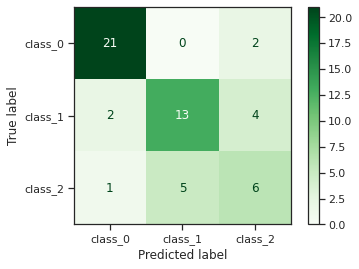

In [34]:
plot_confusion_matrix(cl3, wine_X_test, wine_Y_test, display_labels = wine.target_names, cmap = plt.cm.Greens)

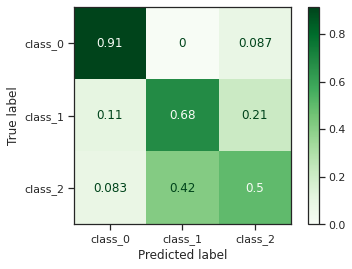

In [35]:
plot_confusion_matrix(cl3, wine_X_test, wine_Y_test, display_labels = wine.target_names, cmap = plt.cm.Greens, normalize='true')

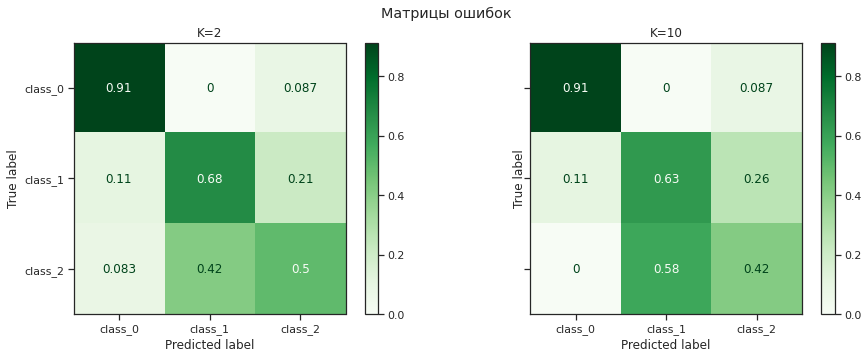

In [37]:
fig, ax=plt.subplots(1, 2, sharex='col', sharey = 'row', figsize = (15,5))

plot_confusion_matrix(cl3, wine_X_test, wine_Y_test, display_labels=wine.target_names, cmap=plt.cm.Greens, normalize='true', ax=ax[0])

plot_confusion_matrix(cl5, wine_X_test, wine_Y_test, display_labels=wine.target_names, cmap=plt.cm.Greens, normalize='true', ax=ax[1])

fig.suptitle("Матрицы ошибок")
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

In [38]:
precision_score(bin_wine_Y_test, bin_target3), recall_score(bin_wine_Y_test, bin_target3)

(0.5, 0.5)

In [39]:
precision_score(bin_wine_Y_test, bin_target5), recall_score(bin_wine_Y_test, bin_target5)

(0.4166666666666667, 0.4166666666666667)

In [40]:
precision_score(wine_Y_test, target3, average = 'micro')

0.7407407407407407

In [42]:
precision_score(wine_Y_test, target3, average = 'macro')

0.6990740740740741

In [43]:
precision_score(wine_Y_test, target3, average = 'weighted')

0.7379115226337448

In [45]:
classification_report(wine_Y_test, target3, target_names = wine.target_names,output_dict=True)

{'accuracy': 0.7407407407407407,
 'class_0': {'f1-score': 0.8936170212765957,
  'precision': 0.875,
  'recall': 0.9130434782608695,
  'support': 23},
 'class_1': {'f1-score': 0.7027027027027027,
  'precision': 0.7222222222222222,
  'recall': 0.6842105263157895,
  'support': 19},
 'class_2': {'f1-score': 0.5, 'precision': 0.5, 'recall': 0.5, 'support': 12},
 'macro avg': {'f1-score': 0.6987732413264328,
  'precision': 0.6990740740740741,
  'recall': 0.6990846681922197,
  'support': 54},
 'weighted avg': {'f1-score': 0.7389730155687603,
  'precision': 0.7379115226337448,
  'recall': 0.7407407407407407,
  'support': 54}}

In [46]:
fpr, tpr, thresholds = roc_curve(bin_wine_Y_test, bin_target3, pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.14285714, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0]))

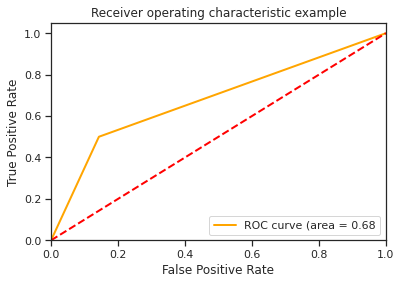

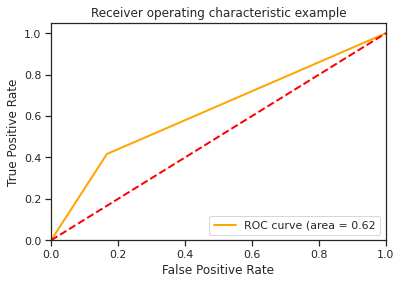

In [51]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color = 'orange', lw=lw, label = 'ROC curve (area = %0.2f' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color = 'red', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

draw_roc_curve(bin_wine_Y_test, bin_target3, pos_label=1, average = 'micro')
draw_roc_curve(bin_wine_Y_test, bin_target5, pos_label=1, average = 'micro')

In [52]:
wine_cross = cross_val_score(KNeighborsClassifier(n_neighbors=2), wine.data, wine.target, cv = 11)
wine_cross

array([0.58823529, 0.64705882, 0.6875    , 0.5625    , 0.5625    ,
       0.625     , 0.8125    , 0.6875    , 0.8125    , 0.75      ,
       0.75      ])

In [53]:
np.mean(wine_cross)

0.68048128342246

In [55]:
wining = {
    'precesion': 'precision_weighted', 
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
    }
wine_cross = cross_validate(KNeighborsClassifier(n_neighbors=2), wine.data, wine.target, scoring=wining, cv=3, return_train_score=True)
wine_cross

{'fit_time': array([0.00110579, 0.00059104, 0.00049162]),
 'score_time': array([0.00671053, 0.00433683, 0.00383377]),
 'test_f1': array([0.51069094, 0.6198816 , 0.6798559 ]),
 'test_precesion': array([0.48984127, 0.62317561, 0.70585516]),
 'test_recall': array([0.56666667, 0.6440678 , 0.72881356]),
 'train_f1': array([0.89415947, 0.8703245 , 0.8181316 ]),
 'train_precesion': array([0.91000807, 0.8877454 , 0.85825075]),
 'train_recall': array([0.89830508, 0.87394958, 0.83193277])}

In [56]:
n_range = np.array(range(5, 30 ,1))
tuned_param = [{'n_neighbors': n_range}]
tuned_param

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29])}]

In [57]:
%%time
classific_gs = GridSearchCV(KNeighborsClassifier(),tuned_param, cv=5, scoring='accuracy')
classific_gs.fit(wine_X_train, wine_Y_train)

CPU times: user 277 ms, sys: 1.34 ms, total: 278 ms
Wall time: 279 ms


In [58]:
classific_gs.cv_results_

{'mean_fit_time': array([0.00050635, 0.00039325, 0.000421  , 0.00041065, 0.00041933,
        0.00040789, 0.00038476, 0.00041876, 0.00041499, 0.00041833,
        0.00041099, 0.00039482, 0.00040603, 0.00039215, 0.00039759,
        0.00041804, 0.0004149 , 0.00041809, 0.00040574, 0.00040874,
        0.00038857, 0.00039635, 0.00040355, 0.0003984 , 0.00041142]),
 'mean_score_time': array([0.00179543, 0.00140705, 0.00142345, 0.00142317, 0.00144773,
        0.00141902, 0.0013968 , 0.00138464, 0.00145521, 0.00149326,
        0.00141726, 0.00140929, 0.00138726, 0.00143409, 0.00151563,
        0.00157661, 0.00144815, 0.00150456, 0.00145593, 0.00148907,
        0.00141406, 0.00148759, 0.0014801 , 0.00142283, 0.0014554 ]),
 'mean_test_score': array([0.67666667, 0.725     , 0.66833333, 0.676     , 0.69266667,
        0.67666667, 0.67666667, 0.70033333, 0.70933333, 0.685     ,
        0.69333333, 0.71766667, 0.726     , 0.72633333, 0.726     ,
        0.734     , 0.734     , 0.75      , 0.726     , 0

In [59]:
classific_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [60]:
classific_gs.best_score_

0.7500000000000001

In [62]:
classific_gs.best_params_

{'n_neighbors': 22}